# K-Means Clustering Analysis of NYC Airbnb Data

We perform k-means clustering on all numeric variables in the dataset to identify patterns and segment listings.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# Load and preprocess data
df = pd.read_csv("nyc_airbnb_cleaned.csv")
df_numeric = df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

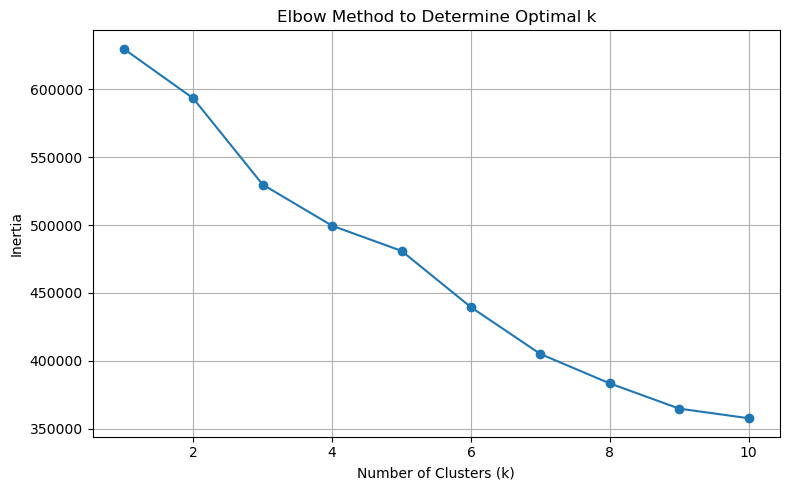

In [5]:
# Elbow method to determine k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_numeric_clustered = df_numeric.copy()
df_numeric_clustered['cluster'] = clusters

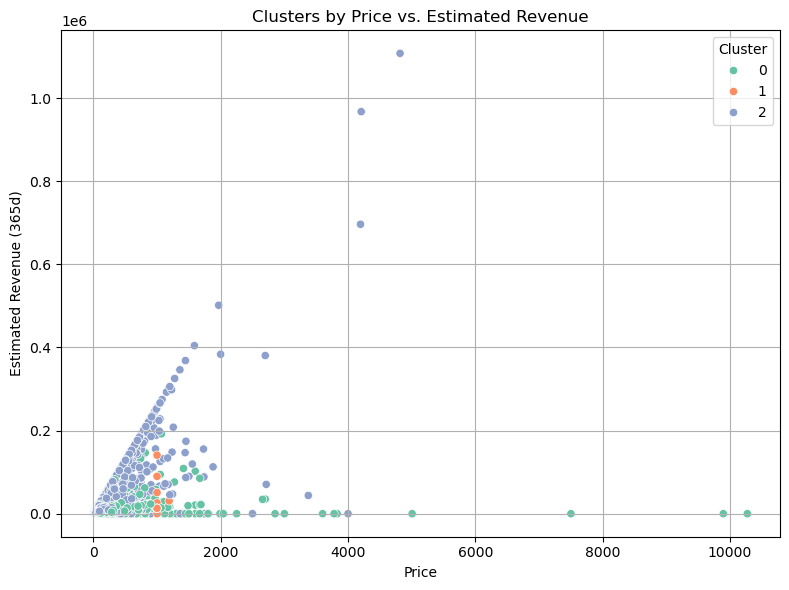

In [7]:
# Visualize cluster relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric_clustered, x='price', y='estimated_revenue_l365d', hue='cluster', palette='Set2')
plt.title('Clusters by Price vs. Estimated Revenue')
plt.xlabel('Price')
plt.ylabel('Estimated Revenue (365d)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Descriptive stats per cluster
df_numeric_clustered.groupby('cluster').median()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
cluster,,,,,,,,,,,,,,,,,,,,,
0,5.261268e+07,128284544.0,2.0,4.0,40.721940,-73.944875,2.0,1.0,1.0,1.0,...,4.800,4.93,4.93,4.80,4.71,2.0,1.0,1.0,0.0,0.34
1,8.156941e+17,107434423.0,293.0,1111.0,40.746115,-73.970829,2.0,1.0,1.0,1.0,...,3.915,4.00,4.00,4.00,3.00,247.0,32.0,0.0,0.0,0.09
2,5.139235e+17,86213021.0,2.0,4.0,40.721790,-73.953598,2.0,1.0,1.0,1.0,...,4.850,4.94,4.95,4.84,4.77,2.0,1.0,0.0,0.0,0.74


## 📌 Interpretation
- **Cluster 2** groups large-scale hosts with perfect reviews and high revenue—clearly professional operators.
- **Cluster 1** appears to include more casual or budget-oriented hosts.
- **Cluster 0** may be part-time or moderate earners.

This analysis helps uncover behavioral patterns that could guide business decisions like marketing, pricing strategies, or host engagement tactics.
